# Machine learning to predict molecule properties : solubility



The solubility of molecules is an important property in many applications like for drug selection or for compound selection for battery designes (no link to health).

Being able to predict the solubility of a molecule from its formula instead of having to make measuring experiment in an important aspect to enhanced fatester molecule discovery.

In this notebook we will do basic solubility prediction with machine learning models and rdkit


Install the python rdkit package with pip or conda

cf https://www.rdkit.org/docs/index.html

In [2]:
!pip install rdkit-pypi

     |████████████████████████████████| 16.1 MB 9.4 MB/s eta 0:00:01


# Molecule representations with Rdkit

Rdkit is a package allowing to work with molecule data and their representation. 

For basic manipulations, the main submodule is **Chem**



### Smile representation

Smile lets represent molecules with text strings




The following string contains the SMILE representation of the paracetamol molecule

In [4]:
smile = 'CC(=O)NC1=CC=C(O)C=C1'

import rdkit and the Chem submodule

In [5]:
from rdkit import Chem

Using the MolFromSmiles function, create a molecule from the smile representation and print its types

In [55]:
mol = Chem.MolFromSmiles(smile)

In [51]:
type(mol)

rdkit.Chem.rdchem.Mol

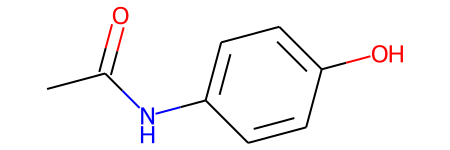

In [7]:
mol

In [52]:
print(mol)

With the MolToImage function of the Draw package, display the molecule

In [8]:
from rdkit.Chem import Draw

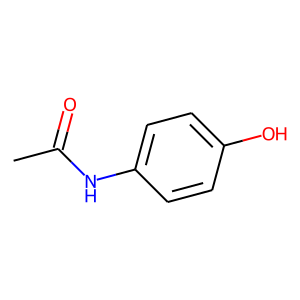

In [56]:
Draw.MolToImage(mol)

You can get the Number of atoms of the molecules and the list of atoms with the methods GetNumAtoms and getAtoms.

Print the number of atoms of the molecule

In [10]:
mol.GetNumAtoms()

11

If you compare to the picture, you may see that the number of atoms is not 11. What is the total number and why rdkit do not give the same answer ?

8

Print the list of each atoms

In [21]:
for atom in mol.GetAtoms():
    print(atom.GetSymbol())
    #print(atom.GetAtomicNum())

C
C
O
N
C
C
C
C
O
C
C


Store the number of bonds of the molecule in **n_bond** (look which method can be used for that) and print

In [27]:
n_bond = len(mol.GetBonds())
n_bond

11

For each bond, print if the bond is single or double

In [28]:
for bond in mol.GetBonds():
    print(bond.GetBondType())

SINGLE
DOUBLE
SINGLE
SINGLE
AROMATIC
AROMATIC
AROMATIC
SINGLE
AROMATIC
AROMATIC
AROMATIC


### Reading molecule data from file

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at 
https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf. 


Download this file and save it in a folder. 




Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier" and store the result in a variable named **morphine**



In [38]:
!ls

2DB00295.sdf         DB00295.sdf.txt      Rdkit_exercise.ipynb


In [40]:
morphine = Chem.SDMolSupplier('DB00295.sdf')

Display its type

In [43]:
type(morphine)

rdkit.Chem.rdmolfiles.SDMolSupplier

Display the picture of the molecule


In [59]:
for m in morphine:
    mol = m
    #Draw.MolToImage(m)

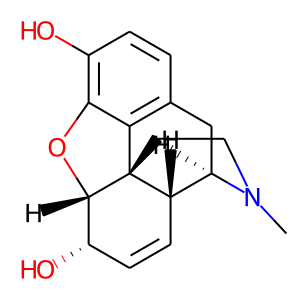

In [60]:
Draw.MolToImage(morphine[0])

Display the number of atoms and the number of bonds

In [62]:
morphine[0].GetNumAtoms()

21

In [61]:
len(morphine[0].GetBonds())

25

### Descriptors 


Molecules are also described by a set of physiochemical descriptors like 
- the log partition coefficient,
- the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.

The rdkit.ML.Descriptors module and its sub module let us compute molecule descriptors.

the rdkit.ML.Descriptors module has an attribute name \_descList, display it

In [65]:
from rdkit.Chem import Descriptors

In [66]:
Descriptors._descList

[('MaxEStateIndex',
  <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>),
 ('MinEStateIndex',
  <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>),
 ('MaxAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>),
 ('MinAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MinAbsEStateIndex(mol, force=1)>),
 ('qed',
  <function rdkit.Chem.QED.qed(mol, w=QEDproperties(MW=0.66, ALOGP=0.46, HBA=0.05, HBD=0.61, PSA=0.06, ROTB=0.65, AROM=0.48, ALERTS=0.95), qedProperties=None)>),
 ('MolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('HeavyAtomMolWt', <function rdkit.Chem.Descriptors.HeavyAtomMolWt(x)>),
 ('ExactMolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('NumValenceElectrons',
  <function rdkit.Chem.Descriptors.NumValenceElectrons(mol)>),
 ('NumRadicalElectrons',
  <function rdkit.Chem.Descriptors.NumRadicalElectrons(mol)>),
 ('MaxPartialCharge',
  <function rdkit.Chem.Descriptors.MaxPartialCharge(mo

In [68]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

listMolDesc = []

for des in Descriptors._descList:
    listMolDesc.append(des[0])

calulator = MolecularDescriptorCalculator(listMolDesc)

Compute all descriptors in the _descList list of the paracetamol molecule using the MoleculeDescriptors.MolecularDescriptorCalculator class

In [72]:
calulator.CalcDescriptors(mol)

(10.524468537414966,
 -0.11510204081632636,
 10.524468537414966,
 0.11510204081632636,
 0.5950261967780849,
 151.165,
 142.093,
 151.063328528,
 58,
 0,
 0.22074743631242583,
 -0.5079643157925783,
 0.5079643157925783,
 0.22074743631242583,
 1.3636363636363635,
 1.9090909090909092,
 2.3636363636363638,
 16.25468871437965,
 10.280190859964755,
 1.9280360590359866,
 -1.9945540738765895,
 2.12524757916018,
 -2.04401131261029,
 5.88095478459792,
 -0.11373578338266109,
 2.7362980721056545,
 253.29949758389105,
 8.267584713501616,
 6.164862962722325,
 6.164862962722325,
 5.1815405503520555,
 3.2490981480278296,
 3.2490981480278296,
 2.228060242189872,
 2.228060242189872,
 1.1876733148984595,
 1.1876733148984595,
 0.7480265991539318,
 0.7480265991539318,
 -1.5099999999999998,
 285.51074052739676,
 7.595374077976819,
 3.0531381005525,
 2.292303972882069,
 64.66690538413799,
 10.423315998847038,
 5.749511833283905,
 0.0,
 5.907179729351506,
 0.0,
 0.0,
 4.794537184071822,
 0.0,
 0.0,
 0.0,
 0.0,

Display the names and the fvalues of the descriptors

In [70]:
calulator.descriptorNames

('MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

### Fingerprinting


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.





With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector. 

Display its type

With the DataStructs module convert it to a numpy vector and display it shape and display it

Create a function smiles_to_np_morganfingerprinting which takes a smile representation and gives back the numpy version of the morgan finger_printing

Compute the morgan finger printing of the aspirin (CC(=O)OC1=CC=CC=C1C(O)=O) and paracetamol (CC(=O)NC1=CC=C(O)C=C1)

Compute the DiceSimilarity of the two molecules

### SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.



Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).




Highlight the pattern "CCC" in these molecules.




Do the same thing ex 1 but for the pattern "C(=O)N".